In [1]:
import os
import csv

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from config import api_key
from pprint import pprint
from pandas.plotting import table


Extra optional cell to run for instant conversion from text to csv file

In [2]:
import tkinter as tk
from tkinter import filedialog
from tkinter import messagebox
import pandas as pd

root= tk.Tk()

canvas1 = tk.Canvas(root, width = 300, height = 300, bg = 'lightsteelblue2', relief = 'raised')
canvas1.pack()

label1 = tk.Label(root, text='File Conversion Tool', bg = 'lightsteelblue2')
label1.config(font=('helvetica', 20))
canvas1.create_window(150, 60, window=label1)

def getTxt ():
    global read_file
    
    import_file_path = filedialog.askopenfilename()
    read_file = pd.read_csv(import_file_path)
    
browseButtonTxt = tk.Button(text="      Import Text File     ", command=getTxt, bg='green', fg='white', font=('helvetica', 12, 'bold'))
canvas1.create_window(150, 130, window=browseButtonTxt)

def convertToCsv ():
    global read_file
    
    export_file_path = filedialog.asksaveasfilename(defaultextension='.csv')
    read_file.to_csv (export_file_path, index = None)

saveAsButtonCsv = tk.Button(text='Convert Text to CSV', command=convertToCsv, bg='green', fg='white', font=('helvetica', 12, 'bold'))
canvas1.create_window(150, 180, window=saveAsButtonCsv)

def exitApplication():
    MsgBox = tk.messagebox.askquestion ('Exit Application','Are you sure you want to exit the application',icon = 'warning')
    if MsgBox == 'yes':
       root.destroy()
     
exitButton = tk.Button (root, text='       Exit Application     ',command=exitApplication, bg='brown', fg='white', font=('helvetica', 12, 'bold'))
canvas1.create_window(150, 230, window=exitButton)

root.mainloop()

In [3]:
#reading the text file to convert to csv
read_file = pd.read_csv (r'Data/CommViolPredUnnormalizedData.txt',header = None)

In [4]:
#converted file printed to csv
read_file.to_csv (r'Data/Newark_city_one_line.csv',index=None)

read_file.columns = ['column_1', 'column_2",..]

In [5]:
csvpath = os.path.join("Data/Newark_city_one_line.csv")
print(csvpath)

Data/Newark_city_one_line.csv


In [6]:
#noting  data set to process
newark_crime = ("Data/Newark_city_one_line.csv")


In [7]:
#pulling in all cities and states
crime_df = pd.read_csv(newark_crime, encoding="ISO-8859-1", index_col=None)
crime_df.head()

,0,1,2,3,4,5,6,7,8,9,...,137,138,139,140,141,142,143,144,145,146
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,225,1301.78,716,4142.56,47,271.93,?,?,306.64,?
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,91,728.93,1060,8490.87,91,728.93,5,40.05,?,9988.79


In [8]:
crime_df.reset_index()
crime_df.head()

,0,1,2,3,4,5,6,7,8,9,...,137,138,139,140,141,142,143,144,145,146
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,225,1301.78,716,4142.56,47,271.93,?,?,306.64,?
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,91,728.93,1060,8490.87,91,728.93,5,40.05,?,9988.79


In [9]:
#naming columns for better description of each column

crime_df.columns = ['cityname','state','countyCode','communityCode','fold','population',
                        'householdsize','racepctblack','racePctWhite','racePctAsian','racePctHisp',
                        'agePct12t21','agePct12t29','agePct16t24','agePct65up','numbUrban','pctUrban','medIncome',
                        'pctWWage','pctWFarmSelf','pctWInvInc','pctWSocSec','pctWPubAsst','pctWRetire','medFamInc',
                        'perCapInc','whitePerCap','blackPerCap','indianPerCap','AsianPerCap','OtherPerCap','HispPerCap',
                        'NumUnderPov','PctPopUnderPov','PctLess9thGrade','PctNotHSGrad','PctBSorMore','PctUnemployed',
                        'PctEmploy','PctEmplManu','PctEmplProfServ','PctOccupManu','PctOccupMgmtProf','MalePctDivorce',
                        'MalePctNevMarr','FemalePctDiv','TotalPctDiv','PersPerFam','PctFam2Par','PctKids2Par','PctYoungKids2Par',
                        'PctTeen2Par','PctWorkMomYoungKids','PctWorkMom','NumKidsBornNeverMar','PctKidsBornNeverMar','NumImmig',
                        'PctImmigRecent','PctImmigRec5','PctImmigRec8','PctImmigRec10','PctRecentImmig','PctRecImmig5',
                        'PctRecImmig8','PctRecImmig10','PctSpeakEnglOnly','PctNotSpeakEnglWell','PctLargHouseFam','PctLargHouseOccup',
                        'PersPerOccupHous','PersPerOwnOccHous','PersPerRentOccHous','PctPersOwnOccup','PctPersDenseHous',
                        'PctHousLess3BR','MedNumBR','HousVacant','PctHousOccup','PctHousOwnOcc','PctVacantBoarded',
                        'PctVacMore6Mos','MedYrHousBuilt','PctHousNoPhone','PctWOFullPlumb','OwnOccLowQuart','OwnOccMedVal',
                        'OwnOccHiQuart','OwnOccQrange','RentLowQ','RentMedian','RentHighQ','RentQrange','MedRent',
                        'MedRentPctHousInc','MedOwnCostPctInc','MedOwnCostPctIncNoMtg','NumInShelters','NumStreet',
                        'PctForeignBorn','PctBornSameState','PctSameHouse85','PctSameCity85','PctSameState85',
                        'LemasSwornFT','LemasSwFTPerPop','LemasSwFTFieldOps','LemasSwFTFieldPerPop','LemasTotalReq',
                        'LemasTotReqPerPop','PolicReqPerOffic','PolicPerPop','RacialMatchCommPol','PctPolicWhite','PctPolicBlack',
                        'PctPolicHisp','PctPolicAsian','PctPolicMinor','OfficAssgnDrugUnits','NumKindsDrugsSeiz','PolicAveOTWorked',
                        'LandArea','PopDens','PctUsePubTrans','PolicCars','PolicOperBudg','LemasPctPolicOnPatr','LemasGangUnitDeploy',
                        'LemasPctOfficDrugUn','PolicBudgPerPop','murders','murdPerPop','rapes','rapesPerPop','robberies',
                        'robbbPerPop','assaults','assaultPerPop','burglaries','burglPerPop','larcenies','larcPerPop','autoTheft',
                        'autoTheftPerPop','arsons','arsonsPerPop','ViolentCrimesPerPop','nonViolPerPop']

crime_df.head()

,cityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,225,1301.78,716,4142.56,47,271.93,?,?,306.64,?
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,91,728.93,1060,8490.87,91,728.93,5,40.05,?,9988.79


In [10]:
#cities_df.count()

In [11]:
#cities_df.dtypes

In [12]:
#from US data set only pull in just the New Jersey data
newjersey_df = crime_df.loc[crime_df["state"] == "NJ"]
newjersey_df

,cityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
45,Bricktownship,NJ,29,7420,1,66473,2.66,0.63,97.81,0.83,...,415,606.2,1214,1773.32,98,143.15,14,20.45,131.47,2543.13
71,ScotchPlainstownship,NJ,39,66060,1,21160,2.79,11.10,83.79,4.57,...,102,469.79,276,1271.19,89,409.91,2,9.21,115.14,2160.1
79,Gallowaytownship,NJ,1,25560,1,23330,2.94,7.36,88.58,2.67,...,266,1113.81,557,2332.3,46,192.61,7,29.31,251.24,3668.03
87,NewProvidenceborough,NJ,39,51810,1,11439,2.70,0.54,94.18,4.90,...,12,99.12,93,768.21,18,148.69,2,16.52,49.56,1032.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2192,Teanecktownship,NJ,3,72360,10,37825,2.91,26.16,66.61,5.62,...,247,625.41,963,2438.35,108,273.46,19,48.11,255.74,3385.32
2198,Hammontontown,NJ,1,29430,10,12208,2.77,1.14,94.86,0.70,...,135,1090.91,258,2084.85,27,218.18,5,40.4,234.34,3434.34
2199,WestMilfordtownship,NJ,31,79460,10,25430,3.03,1.03,97.20,0.91,...,123,460.57,318,1190.74,21,78.63,5,18.72,86.12,1748.67
2201,EggHarbortownship,NJ,1,20290,10,24544,2.71,9.34,86.88,2.46,...,320,1273.73,1046,4163.52,94,374.16,6,23.88,409.98,5835.29


In [13]:
#pull in newark data
newark_df=newjersey_df.loc[newjersey_df["cityname"] == "Newarkcity"]
newark_df

,cityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
1213,Newarkcity,NJ,13,51000,6,275221,3.01,58.46,28.62,1.19,...,6879,2643.41,10420,4004.12,10993,4224.31,184,70.71,3928.03,10942.54


In [14]:
#total newark crime data frame
newark_crime_df= newark_df[["murders","murdPerPop","rapes","rapesPerPop","robberies","robbbPerPop",
                       "assaults","assaultPerPop","burglaries","burglPerPop","larcenies","larcPerPop","autoTheft",
                           "autoTheftPerPop","arsons","arsonsPerPop","ViolentCrimesPerPop","nonViolPerPop"]]
newark_crime_df

,murders,murdPerPop,rapes,rapesPerPop,robberies,robbbPerPop,assaults,assaultPerPop,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
1213,96,36.89,257,98.76,5892,2264.13,3977,1528.25,6879,2643.41,10420,4004.12,10993,4224.31,184,70.71,3928.03,10942.54


In [15]:
#renaming the columns
renamed_crime_newark_df = newark_crime_df.rename(columns={
                                                     "murders":"Murders",
                                                      "murdPerPop":"Murder Per Pop",
                                                      "rapes":"Rapes",
                                        "rapesPerPop":"Rapes per Pop",
                                                      "robberies":"Robberies",
                                                      "robbbPerPop":"Robbery per Pop",
                       "assaults":"Assaults","assaultPerPop":"Assaults per Pop","burglaries":"Burglaries","burglPerPop":"Burglaries per Pop",
                                        "Larcenies":"Larcenies","larcPerPop":"Larcenies per Pop","autoTheft":"AutoTheft",
                           "autoTheftPerPop":"AutoTheft per Pop.","arsons":"Arsons","arsonsPerPop":"Arsons per Pop",
                                        "ViolentCrimesPerPop":"Violent Crime","nonViolPerPop":"Non-Violent "})
renamed_crime_newark_df


,Murders,Murder Per Pop,Rapes,Rapes per Pop,Robberies,Robbery per Pop,Assaults,Assaults per Pop,Burglaries,Burglaries per Pop,larcenies,Larcenies per Pop,AutoTheft,AutoTheft per Pop.,Arsons,Arsons per Pop,Violent Crime,Non-Violent
1213,96,36.89,257,98.76,5892,2264.13,3977,1528.25,6879,2643.41,10420,4004.12,10993,4224.31,184,70.71,3928.03,10942.54


In [16]:
renamed_crime_newark_df.to_csv("output_data/Newark_Crime.csv", index = False)


In [17]:
total_crime=("output_data/Newark_Crime.csv")
total_crime

'output_data/Newark_Crime.csv'

In [18]:
total_crime_df = pd.read_csv(total_crime, encoding="ISO-8859-1")
total_crime_df.head()

,Murders,Murder Per Pop,Rapes,Rapes per Pop,Robberies,Robbery per Pop,Assaults,Assaults per Pop,Burglaries,Burglaries per Pop,larcenies,Larcenies per Pop,AutoTheft,AutoTheft per Pop.,Arsons,Arsons per Pop,Violent Crime,Non-Violent
0,96,36.89,257,98.76,5892,2264.13,3977,1528.25,6879,2643.41,10420,4004.12,10993,4224.31,184,70.71,3928.03,10942.54


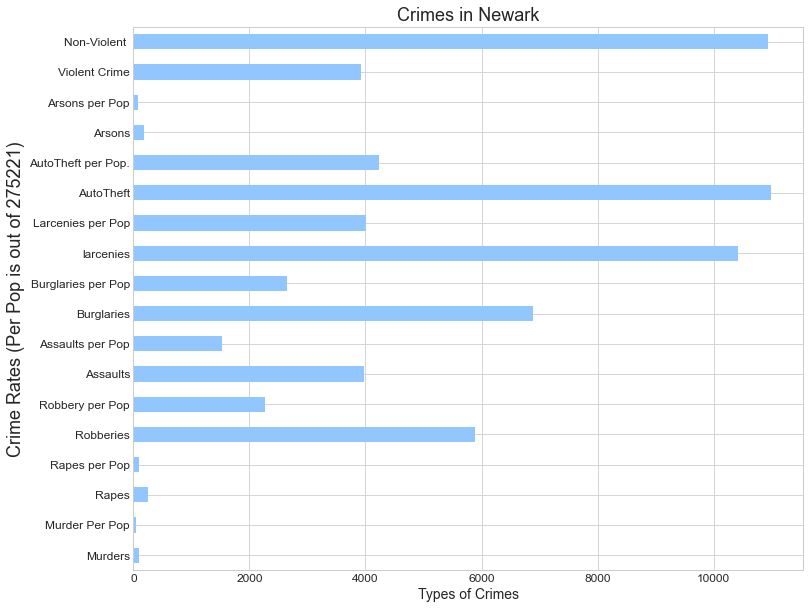

In [37]:
#creating crimes in newark chart

row = total_crime_df.iloc[0]

fig, axs = plt.subplots(figsize=(12, 10))

row.plot(kind='barh', legend = False, fontsize=12)

plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-pastel')

plt.ylabel("Crime Rates (Per Pop is out of 275221)", fontsize=18)
plt.xlabel("Types of Crimes", fontsize=14)
plt.title("Crimes in Newark", fontsize=18)
               
fig.savefig("output_data/crime_Newark_based_on_Population.png")

plt.show()

General summary data below. Not used in final report but used as information while processing data

In [20]:
#newark housing data
newark_housing_df= newark_df[["PctLargHouseFam","PctLargHouseOccup",
                                              "PersPerOccupHous","PersPerOwnOccHous",
                                              "PersPerRentOccHous", "PctPersOwnOccup",
                                              "PctPersDenseHous",
                                              "HousVacant","PctHousOccup",
                                              "PctHousOwnOcc",
                                              "PctVacantBoarded", 
                                              "PctVacMore6Mos",
                                              "MedYrHousBuilt","PctHousNoPhone",
                                              "PctWOFullPlumb","OwnOccLowQuart","RentMedian","RentHighQ",
                                             "RentQrange","MedRent","MedRentPctHousInc",
                                             "MedOwnCostPctInc",
                                             "MedOwnCostPctIncNoMtg"]]
newark_housing_df


,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,HousVacant,PctHousOccup,PctHousOwnOcc,...,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,RentMedian,RentHighQ,RentQrange,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg
1213,13.13,9.07,2.91,3.4,2.76,26.97,13.62,10921,89.34,23.06,...,15.0,2.08,77300,385,494,242,445,26.9,24.4,15.2


In [21]:
newark_housing_rename_df= newark_housing_df.rename(columns={"PctLargHouseFam":"Large House Fam","PctLargHouseOccup":"Large House Occupied",
                                              "PersPerOccupHous":"Person per Occupied House","PersPerOwnOccHous":"Persons per Owned Occupied House",
                                              "PersPerRentOccHous":"Person per Rent Occupied House", "PctPersOwnOccup":"Percent Per Own Occupied",
                                              "PctPersDenseHous":"Percent Person Dense House",
                                              "HousVacant":"House Vacant","PctHousOccup":"Percent House Occupied",
                                              "PctHousOwnOcc":"Percent House Own Occupied",
                                              "PctVacantBoarded":"Percent Vacant Boarded", 
                                              "PctVacMore6Mos":"Pecent Vacant More 6 Month",
                                              "MedYrHousBuilt":"Median Year House Built","PctHousNoPhone":"Percent House No Phone",
                                              "ctWOFullPlumb":"Without Full Plumbing","OwnOccLowQuart":"Own Occupied Low Quart",
                                                    "RentMedian":"Rent Median","RentHighQ":"Rent High Q",
                                             "RentQrange":"Rent Q Range","MedRent":"Med Rent","MedRentPctHousInc":"Med Rent Percent House+Mortgage",
                                             "MedOwnCostPctInc":"Med Own Cost Percent Inc",
                                             "MedOwnCostPctIncNoMtg":"Med Own Cost Percent Not Including Mortgage"})
newark_housing_rename_df

,Large House Fam,Large House Occupied,Person per Occupied House,Persons per Owned Occupied House,Person per Rent Occupied House,Percent Per Own Occupied,Percent Person Dense House,House Vacant,Percent House Occupied,Percent House Own Occupied,...,Percent House No Phone,PctWOFullPlumb,Own Occupied Low Quart,Rent Median,Rent High Q,Rent Q Range,Med Rent,Med Rent Percent House+Mortgage,Med Own Cost Percent Inc,Med Own Cost Percent Not Including Mortgage
1213,13.13,9.07,2.91,3.4,2.76,26.97,13.62,10921,89.34,23.06,...,15.0,2.08,77300,385,494,242,445,26.9,24.4,15.2


In [22]:
newark_housing_rename_df.to_csv("output_data/Newark_Housing.csv", index = False)

In [23]:
newark_pop_df= newark_df[["population","householdsize",
                                 "racepctblack","racePctWhite","racePctAsian","racePctHisp",
                                 "agePct12t21","agePct12t29",
                                 "agePct16t24","agePct65up"]]
newark_pop_df

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up
1213,275221,3.01,58.46,28.62,1.19,26.07,16.79,31.88,16.08,8.51


In [24]:
#population demographics

newark_pop_rename_df=newark_pop_df.rename(columns={"population":"Population",
                                                   "householdsize":"Household Size",
                                 "racepctblack":"Race Percent Black",
                                                   "racePctWhite":"Race Percent White",
                                                   "racePctAsian":"Race Percent Asian",
                                                   "racePctHisp":"Race Percent Hispanic",
                                 "agePct12t21":"Age Percent 12-21",
                                                   "agePct12t29":"Age Percent 12-29",
                                 "agePct16t24":"Age Percent 16-24","agePct65up":"Age Percent 65 up"})
newark_pop_rename_df

,Population,Household Size,Race Percent Black,Race Percent White,Race Percent Asian,Race Percent Hispanic,Age Percent 12-21,Age Percent 12-29,Age Percent 16-24,Age Percent 65 up
1213,275221,3.01,58.46,28.62,1.19,26.07,16.79,31.88,16.08,8.51


In [25]:
newark_pop_rename_df.to_csv("output_data/Newark_Pop_Rename.csv", index = False)

In [26]:
newark_pop_renameb_df=newark_pop_rename_df[["Race Percent Black","Race Percent White",
                                            "Race Percent Asian","Race Percent Hispanic","Age Percent 12-21",
                                            "Age Percent 12-29","Age Percent 16-24","Age Percent 65 up"]]
newark_pop_renameb_df

,Race Percent Black,Race Percent White,Race Percent Asian,Race Percent Hispanic,Age Percent 12-21,Age Percent 12-29,Age Percent 16-24,Age Percent 65 up
1213,58.46,28.62,1.19,26.07,16.79,31.88,16.08,8.51


In [27]:
newark_pop_renameb_df.reset_index(drop=True, inplace=True)
print(newark_pop_renameb_df)

   Race Percent Black  Race Percent White  Race Percent Asian  \
0               58.46               28.62                1.19   

   Race Percent Hispanic  Age Percent 12-21  Age Percent 12-29  \
0                  26.07              16.79              31.88   

   Age Percent 16-24  Age Percent 65 up  
0              16.08               8.51  


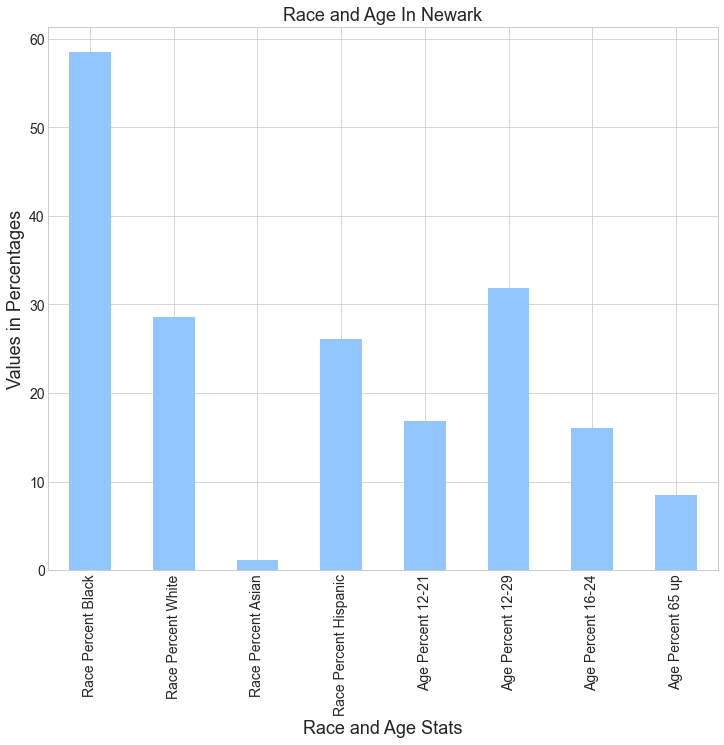

In [28]:
#Race and age chart 
row = newark_pop_renameb_df.iloc[0]
fig, axs = plt.subplots(figsize=(12, 10))
row.plot(kind='bar',legend = False, fontsize=14)


plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-pastel')

axs.set_ylabel("Values in Percentages", fontsize=18)
axs.set_xlabel("Race and Age Stats",fontsize=18)
plt.title("Race and Age In Newark",fontsize=18)

fig.savefig("output_data/Race_and_Age_In_Newark.png")
plt.show()

In [29]:
newark_immigrants_df=newark_df[["PctImmigRecent","PctImmigRec5","PctImmigRec8","PctImmigRec10"]]
newark_immigrants_df

,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10
1213,16.95,29.15,39.29,51.21


In [30]:

newark_immigrants_df.to_csv("output_data/newark_immigrant.csv", index = False)

In [31]:
newark_pop_renameb_df.reset_index(drop=True, inplace=True)
print(newark_immigrants_df)

      PctImmigRecent  PctImmigRec5  PctImmigRec8  PctImmigRec10
1213           16.95         29.15         39.29          51.21


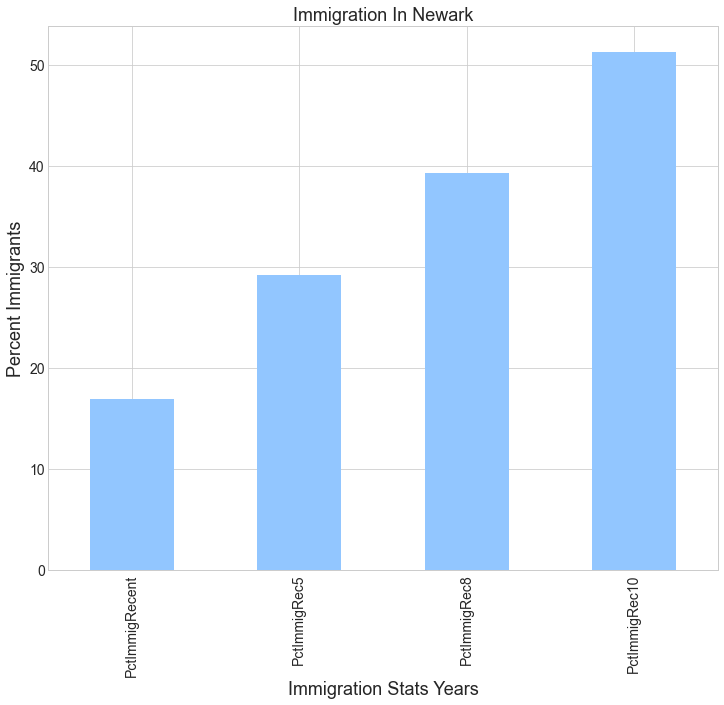

In [32]:
row = newark_immigrants_df.iloc[0]
fig, axs = plt.subplots(figsize=(12, 10))
row.plot(kind='bar',legend = False, fontsize=14)


plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-pastel')

axs.set_ylabel("Percent Immigrants",fontsize=18)
axs.set_xlabel("Immigration Stats Years",fontsize=18)
plt.title("Immigration In Newark",fontsize=18)

fig.savefig("output_data/Immigration_in_Newark.png")

In [33]:
newark_poverty_df=newark_df[["NumUnderPov","PctPopUnderPov"]]
newark_poverty_df



,NumUnderPov,PctPopUnderPov
1213,70702,26.34


In [34]:
newark_poverty_df.to_csv("output_data/newark_poverty.csv", index = False)

In [35]:
newark_school_df=newark_df[["PctLess9thGrade","PctNotHSGrad","PctBSorMore"]]
newark_school_df

,PctLess9thGrade,PctNotHSGrad,PctBSorMore
1213,21.97,48.79,8.55


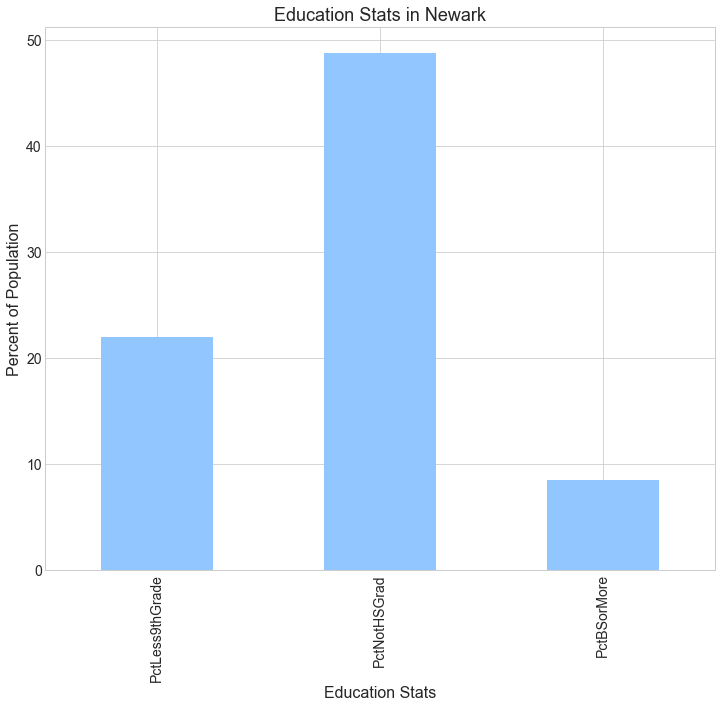

In [36]:
#Graphing for education stats in newark
row = newark_school_df.iloc[0]
fig, axs = plt.subplots(figsize=(12, 10))
row.plot(kind='bar',legend = False, fontsize=14)

plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-pastel')

axs.set_ylabel("Percent of Population", fontsize=16)
axs.set_xlabel("Education Stats", fontsize=16)
plt.title("Education Stats in Newark", fontsize=18)

fig.savefig("output_data/Education_stats_in_Newark.png")
plt.show()